In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn import preprocessing
import ipaddress

import warnings
warnings.simplefilter('ignore')

## Data preprocessing

In [5]:
#DATADIR = '/home/infres/abiapo/prim/data'
DATADIR = '/home/infres/sagbo-21/Documents/PRIM/PRIM/data'

In [6]:
data = pd.read_csv(DATADIR+'/unbalance_mix_data_40_60.csv')
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label,label
0,63090,172.16.0.5-192.168.50.1-53886-52313-17,172.16.0.5,53886,192.168.50.1,52313,17,2018-12-01 12:55:39.691985,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP,1
1,331646,172.16.0.5-192.168.50.4-8761-40089-6,172.16.0.5,8761,192.168.50.4,40089,6,2018-11-03 11:29:59.315895,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn,1
2,23868,172.16.0.5-192.168.50.1-62707-26320-17,172.16.0.5,62707,192.168.50.1,26320,17,2018-12-01 13:53:58.779233,6004043,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1
3,47275,172.16.0.5-192.168.50.1-62519-8952-17,172.16.0.5,62519,192.168.50.1,8952,17,2018-12-01 13:56:35.445012,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1
4,115481,172.16.0.5-192.168.50.1-62543-55990-17,172.16.0.5,62543,192.168.50.1,55990,17,2018-12-01 13:45:14.614697,3001833,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1


In [7]:
data.describe()

,Unnamed:_0,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Inbound,label
count,273177.000000,273177.000000,273177.000000,273177.000000,2.731770e+05,273177.000000,273177.000000,2.731770e+05,2.731770e+05,273177.000000,...,2.731770e+05,2.731770e+05,2.731770e+05,2.731770e+05,2.731770e+05,2.731770e+05,2.731770e+05,2.731770e+05,273177.000000,273177.000000
mean,66914.784155,36856.427800,23715.117869,13.416521,4.909892e+06,5.886217,3.331624,1.593356e+03,2.577865e+03,427.195075,...,3.618286e+04,1.373946e+04,5.440328e+04,2.773934e+04,1.569385e+06,1.186827e+05,1.685770e+06,1.464952e+06,0.674046,0.599999
std,103400.312320,25961.325664,22777.164384,5.248142,2.052951e+07,197.285683,70.799734,3.581282e+04,1.337048e+05,498.106496,...,3.700820e+05,1.619278e+05,4.846757e+05,3.441565e+05,8.279909e+06,1.447031e+06,8.744712e+06,8.038293e+06,0.468731,0.489899
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8161.000000,906.000000,443.000000,6.000000,1.000000e+00,2.000000,0.000000,6.200000e+01,0.000000e+00,31.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,28141.000000,50587.000000,18812.000000,17.000000,5.200000e+01,2.000000,0.000000,8.020000e+02,0.000000e+00,383.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
75%,84068.000000,60012.000000,45291.000000,17.000000,6.305400e+04,4.000000,2.000000,2.064000e+03,0.000000e+00,516.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
max,804544.000000,65534.000000,65535.000000,17.000000,1.199987e+08,100129.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,...,4.050800e+07,1.100562e+07,4.050800e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08,1.000000,1.000000


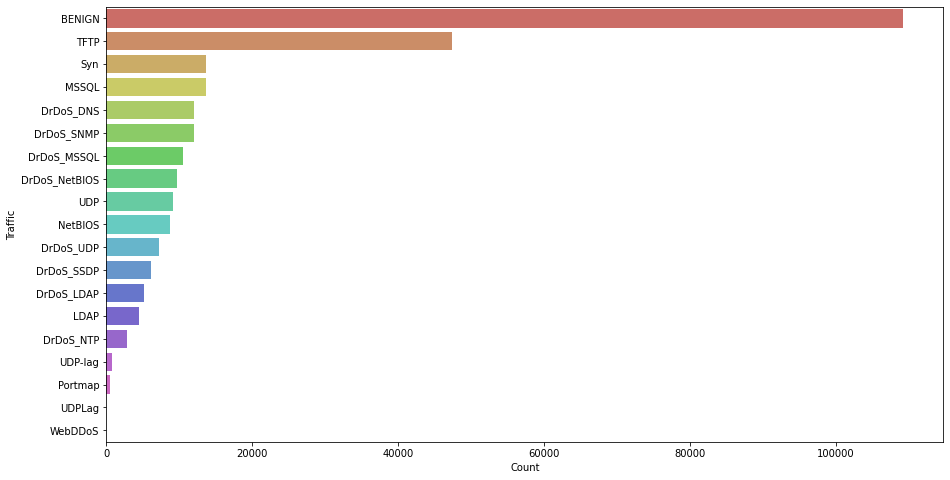

In [8]:
plt.figure(figsize=(15,8))
labels = list(dict(data['Label'].value_counts()).keys())
sizes =  list(dict(data['Label'].value_counts()).values())
sns.barplot(sizes,labels,palette='hls')
plt.xlabel('Count')
plt.ylabel('Traffic')
#plt.savefig('balance_dataset.png', dpi = 150)
plt.show()

In [9]:
data = data.drop(['Unnamed:_0'],axis=1)
data['Source_IP'] = data['Source_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
data['Destination_IP'] = data['Destination_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
data = data.drop(['Flow_ID'],axis=1)
data = data.drop(['Timestamp'],axis=1)
data = data.drop(['SimillarHTTP'],axis=1)
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [10]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1].to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)   

# Feature scaling

In [12]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)

# Feature selection

In [13]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

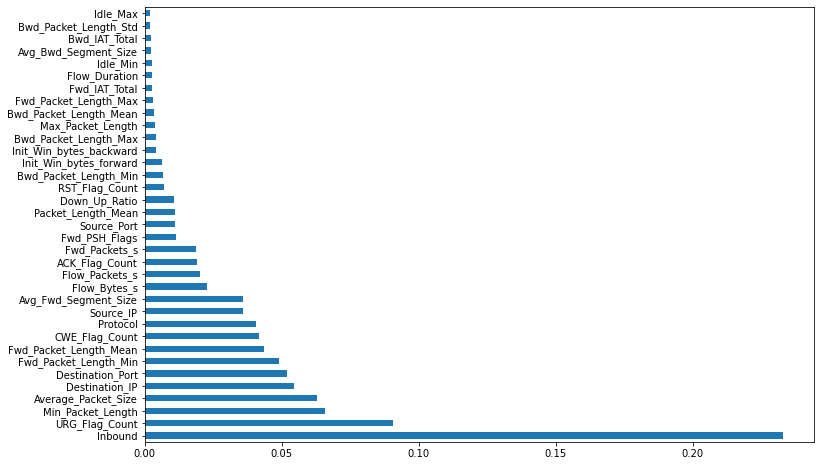

In [14]:
plt.figure(figsize=(12,8))
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

In [15]:
feature_preselect = feat_importances.nlargest(25).index.to_list()

In [16]:
from sklearn.tree import DecisionTreeClassifier
rfe_selector = RFE(estimator=DecisionTreeClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X_train[feature_preselect],y_train)
print(X[feature_preselect].loc[:,rfe_selector.support_].columns.to_list())

['URG_Flag_Count', 'Min_Packet_Length', 'Average_Packet_Size', 'Destination_IP', 'Destination_Port', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'CWE_Flag_Count', 'Protocol', 'Source_IP', 'Flow_Packets_s', 'ACK_Flag_Count', 'Fwd_Packets_s', 'Fwd_PSH_Flags', 'Source_Port', 'Packet_Length_Mean', 'Down_Up_Ratio', 'RST_Flag_Count', 'Bwd_Packet_Length_Min', 'Init_Win_bytes_forward']


In [17]:
principal_feature = X_train[feature_preselect].loc[:,rfe_selector.support_].columns.to_list()

In [18]:
X_train = X_train[principal_feature]
X_test = X_test[principal_feature]

## Models

In [19]:
def cal_accuracy(y_test, y_pred): 
    print("Confusion Matrix: ")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    print(classification_report(y_test, y_pred))

#### Decision Tree

Confusion Matrix: 
Accuracy :  99.99626719423654
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



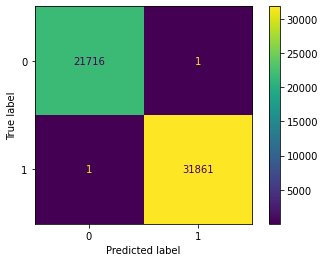

In [20]:
from sklearn.tree import DecisionTreeClassifier 
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_entropy.fit(X_train, y_train) 
y_pred_entropy = clf_entropy.predict(X_test)
cal_accuracy(y_test, y_pred_entropy)

#### Naive Bayes

Confusion Matrix: 
Accuracy :  98.62259467328617
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21717
           1       1.00      0.98      0.99     31862

    accuracy                           0.99     53579
   macro avg       0.98      0.99      0.99     53579
weighted avg       0.99      0.99      0.99     53579



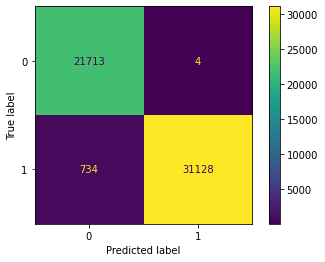

In [21]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred_nb = gnb.predict(X_test)
cal_accuracy(y_test, y_pred_nb)

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_dt = clf_entropy.predict_proba(X_test)
pred_prob_nb = gnb.predict_proba(X_test)

# roc curve for models
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_nb, tpr_nb, thresh_nb = roc_curve(y_test, pred_prob_nb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_nb = roc_auc_score(y_test, pred_prob_nb[:,1])

print(auc_score_dt, auc_score_nb)

0.9999612838874807 0.9997269393678204


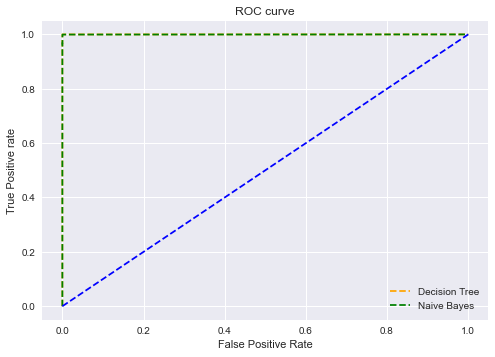

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='green', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Logistic Regression

Confusion Matrix: 
Accuracy :  99.80962690606394
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



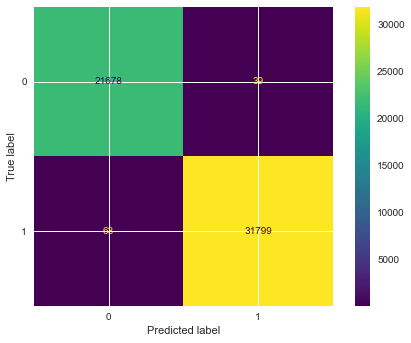

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state = 0)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
cal_accuracy(y_test, y_pred_lr)

#### Support Vector Machine with gaussian kernel

Confusion Matrix: 
Accuracy :  99.99440079135482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



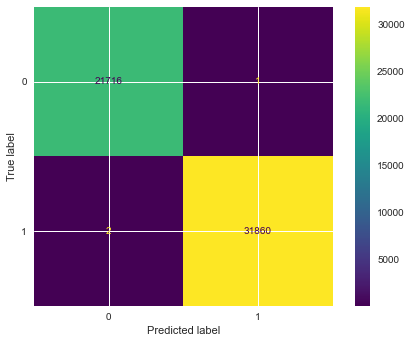

In [25]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf', random_state = 0,C=10.0, gamma=0.1,probability=True)
clf_svm.fit(X_train, y_train)
y_pred_svc = clf_svm.predict(X_test)
cal_accuracy(y_test, y_pred_svc)

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_logreg = logreg.predict_proba(X_test)
pred_prob_svm = clf_svm.predict_proba(X_test)

# roc curve for models
fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_test, pred_prob_logreg[:,1], pos_label=1)
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, pred_prob_svm[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score_logreg = roc_auc_score(y_test, pred_prob_logreg[:,1])
auc_score_svm = roc_auc_score(y_test, pred_prob_svm[:,1])

print(auc_score_logreg, auc_score_svm)

0.999777280647256 0.9999999754316463


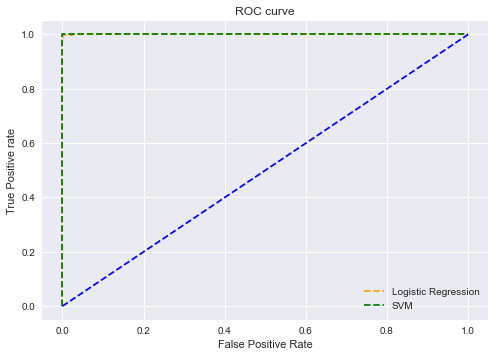

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_logreg, tpr_logreg, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, linestyle='--',color='green', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### K Nearest Neighbor

Confusion Matrix: 
Accuracy :  99.98880158270964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



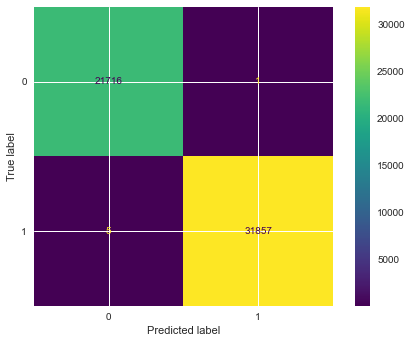

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cal_accuracy(y_test, y_pred_knn)

#### Random Forest

Confusion Matrix: 
Accuracy :  99.99440079135482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



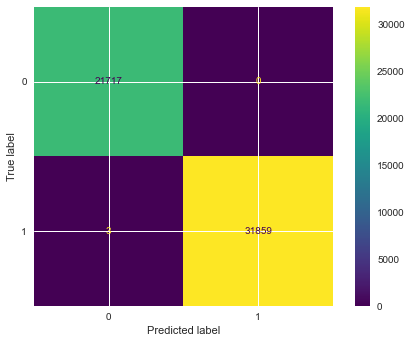

In [29]:
from sklearn.ensemble import RandomForestClassifier
rndForest =RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rndForest.fit(X_train,y_train)
y_pred_rf = rndForest.predict(X_test)
cal_accuracy(y_test, y_pred_rf)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_knn = knn.predict_proba(X_test)
pred_prob_rf = rndForest.predict_proba(X_test)

# roc curve for models
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])
auc_score_rf = roc_auc_score(y_test, pred_prob_rf[:,1])

print(auc_score_knn, auc_score_rf)

0.999945587599828 1.0


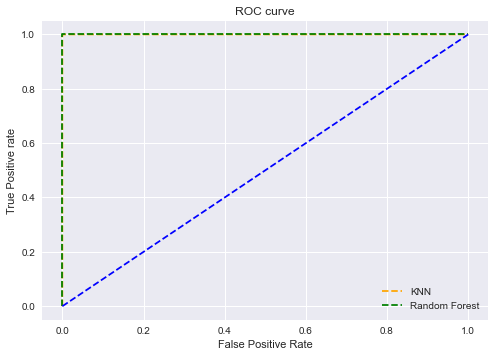

In [31]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange', label='KNN')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### XGBoost

Confusion Matrix: 
Accuracy :  99.99813359711828
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



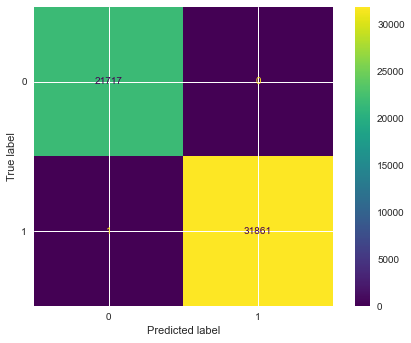

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
cal_accuracy(y_test, y_pred_xgb)

In [33]:
print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


 #### LightGBM

Confusion Matrix: 
Accuracy :  99.99440079135482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



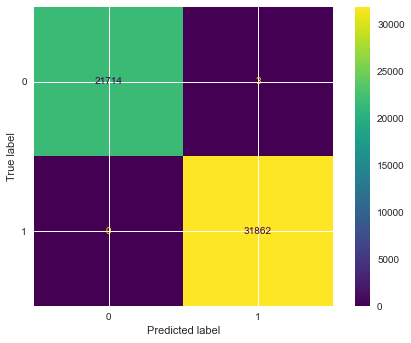

In [34]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
cal_accuracy(y_test, y_pred_lgb)

In [35]:
print('Training set score: {:.4f}'.format(lgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9999


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_xgb = xgb.predict_proba(X_test)
pred_prob_lgb = lgb.predict_proba(X_test)

# roc curve for models
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, pred_prob_xgb[:,1], pos_label=1)
fpr_lgb, tpr_lgb, thresh_lgb = roc_curve(y_test, pred_prob_lgb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score_xgb = roc_auc_score(y_test, pred_prob_xgb[:,1])
auc_score_lgb = roc_auc_score(y_test, pred_prob_lgb[:,1])

print(auc_score_xgb, auc_score_lgb)

0.9999999985548027 0.9999999682056597


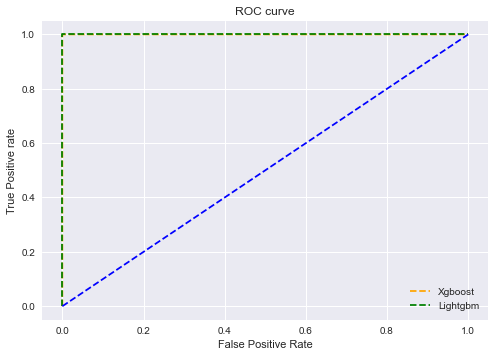

In [37]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='orange', label='Xgboost')
plt.plot(fpr_lgb, tpr_lgb, linestyle='--',color='green', label='Lightgbm')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Multi Layer Perceptron

Confusion Matrix: 
Accuracy :  99.98133597118274
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21717
           1       1.00      1.00      1.00     31862

    accuracy                           1.00     53579
   macro avg       1.00      1.00      1.00     53579
weighted avg       1.00      1.00      1.00     53579



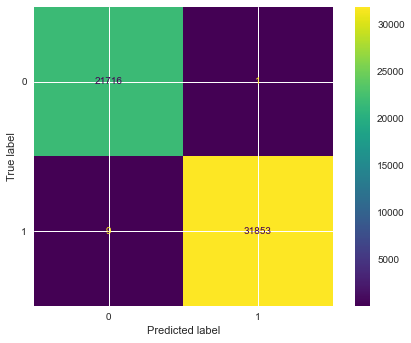

In [38]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100),
                        max_iter = 300,activation = 'logistic',
                        solver = 'adam')
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
cal_accuracy(y_test, y_pred_mlp)

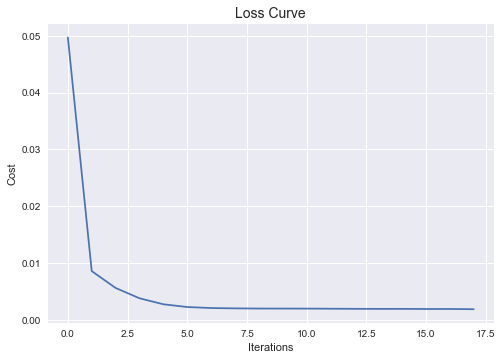

In [39]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [40]:
print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

pred_prob_mlp = mlp_clf.predict_proba(X_test)

# roc curve for models
fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(y_test, pred_prob_mlp[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score_mlp = roc_auc_score(y_test, pred_prob_mlp[:,1])

print(auc_score_mlp)

0.9999445868007121


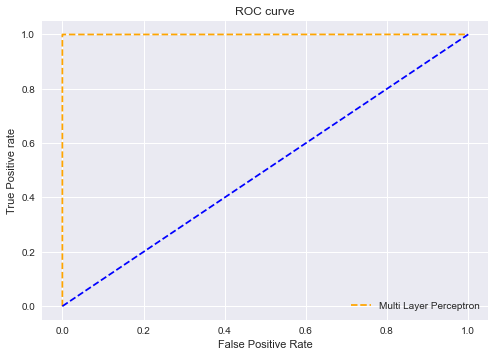

In [42]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_mlp, tpr_mlp, linestyle='--',color='orange', label='Multi Layer Perceptron')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Recap

In [45]:
result_recap = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1-score','AUC'])
result_recap = result_recap.append([{'Model':'Decision Tree', 'Accuracy':accuracy_score(y_test,y_pred_entropy)*100, 'Precision' : precision_score(y_test,y_pred_entropy)*100 ,
                     'Recall': recall_score(y_test,y_pred_entropy)*100 , 'F1-score': f1_score(y_test, y_pred_entropy)*100 , 'AUC' :auc_score_dt*100 },
                     {'Model':'Naive Bayes', 'Accuracy':accuracy_score(y_test,y_pred_nb)*100, 'Precision' : precision_score(y_test,y_pred_nb)*100 ,
                     'Recall': recall_score(y_test,y_pred_nb)*100 , 'F1-score': f1_score(y_test, y_pred_nb)*100 , 'AUC' :auc_score_nb*100 },
                     {'Model':'Logistic Regression', 'Accuracy':accuracy_score(y_test,y_pred_lr)*100, 'Precision' : precision_score(y_test,y_pred_lr)*100 ,
                     'Recall': recall_score(y_test,y_pred_lr)*100 , 'F1-score': f1_score(y_test, y_pred_lr)*100 , 'AUC' :auc_score_logreg*100 },
                    {'Model':'SVM', 'Accuracy':accuracy_score(y_test,y_pred_svc)*100, 'Precision' : precision_score(y_test,y_pred_svc)*100 ,
                     'Recall': recall_score(y_test,y_pred_svc)*100 , 'F1-score': f1_score(y_test, y_pred_svc)*100 , 'AUC' :auc_score_svm*100 },
                    {'Model':'KNN', 'Accuracy':accuracy_score(y_test,y_pred_knn)*100, 'Precision' : precision_score(y_test,y_pred_knn)*100 ,
                     'Recall': recall_score(y_test,y_pred_knn)*100 , 'F1-score': f1_score(y_test, y_pred_knn)*100 , 'AUC' :auc_score_knn*100 },
                    {'Model':'Random Forest', 'Accuracy':accuracy_score(y_test,y_pred_rf)*100, 'Precision' : precision_score(y_test,y_pred_rf)*100 ,
                     'Recall': recall_score(y_test,y_pred_rf)*100 , 'F1-score': f1_score(y_test, y_pred_rf)*100 , 'AUC' :auc_score_rf*100 },
                    {'Model':'Xgboost', 'Accuracy':accuracy_score(y_test,y_pred_xgb)*100, 'Precision' : precision_score(y_test,y_pred_xgb)*100 ,
                     'Recall': recall_score(y_test,y_pred_xgb)*100 , 'F1-score': f1_score(y_test, y_pred_xgb)*100 , 'AUC' :auc_score_xgb*100 },
                    {'Model':'Ligtgbm', 'Accuracy':accuracy_score(y_test,y_pred_lgb)*100, 'Precision' : precision_score(y_test,y_pred_lgb)*100 ,
                     'Recall': recall_score(y_test,y_pred_lgb)*100 , 'F1-score': f1_score(y_test, y_pred_lgb)*100 , 'AUC' :auc_score_lgb*100},
                    {'Model':'Multi Layer Perceptron', 'Accuracy':accuracy_score(y_test,y_pred_mlp)*100, 'Precision' : precision_score(y_test,y_pred_mlp)*100 ,
                     'Recall': recall_score(y_test,y_pred_mlp)*100 , 'F1-score': f1_score(y_test, y_pred_mlp)*100 , 'AUC' :auc_score_mlp*100}],ignore_index=True)
result_recap.set_index('Model',inplace = True)
result_recap

,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Decision Tree,99.996267,99.996861,99.996861,99.996861,99.996128
Naive Bayes,98.622595,99.987151,97.696315,98.82846,99.972694
Logistic Regression,99.809627,99.877505,99.802272,99.839874,99.977728
SVM,99.994401,99.996861,99.993723,99.995292,99.999998
KNN,99.988802,99.996861,99.984307,99.990584,99.994559
Random Forest,99.994401,100.0,99.990584,99.995292,100.0
Xgboost,99.998134,100.0,99.996861,99.998431,100.0
Ligtgbm,99.994401,99.990585,100.0,99.995292,99.999997
Multi Layer Perceptron,99.981336,99.996861,99.971753,99.984305,99.994459


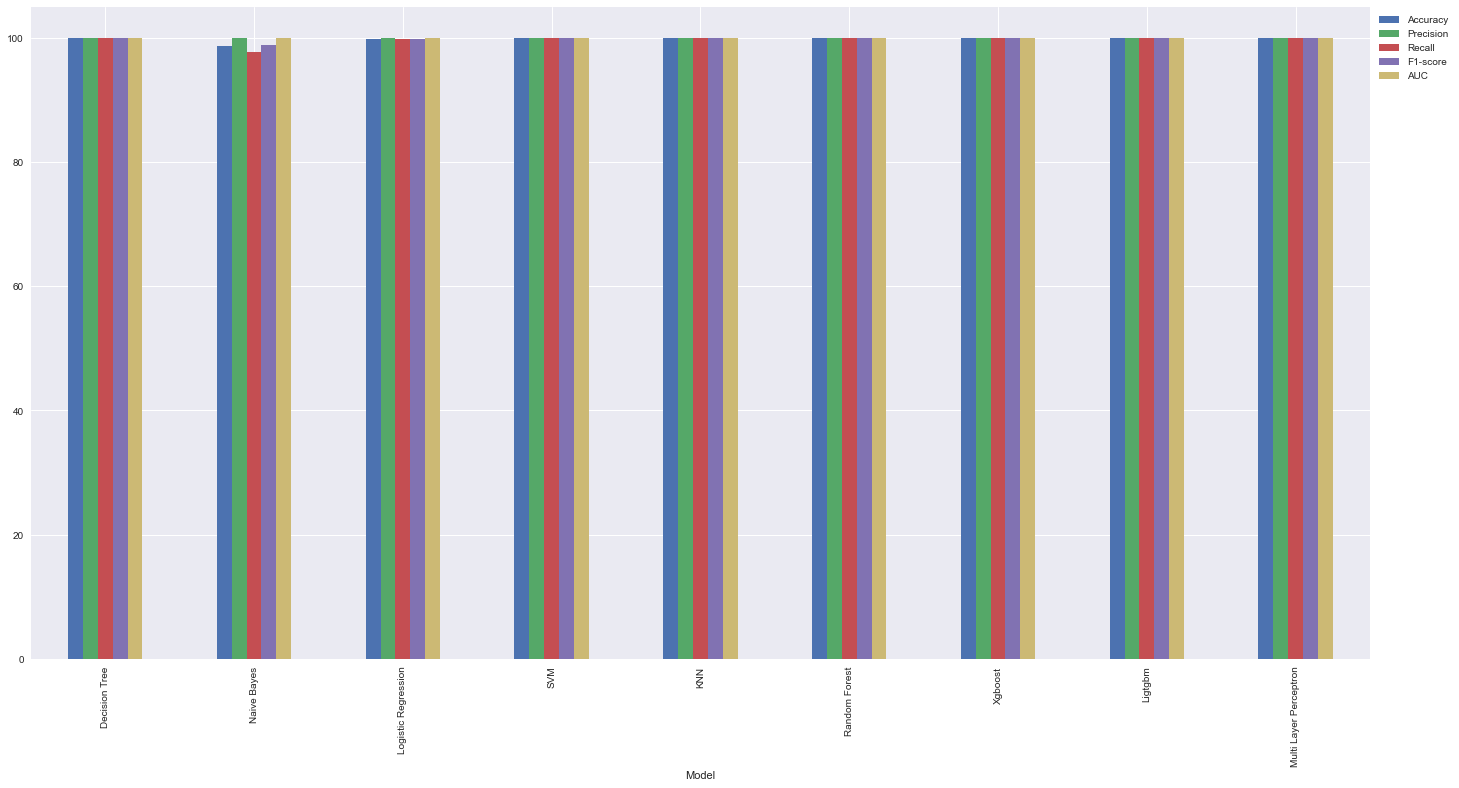

In [46]:
plt.style.use('seaborn')
result_recap.plot(kind='bar',figsize=(24,12))
plt.legend(bbox_to_anchor=(1.0, 1.0))

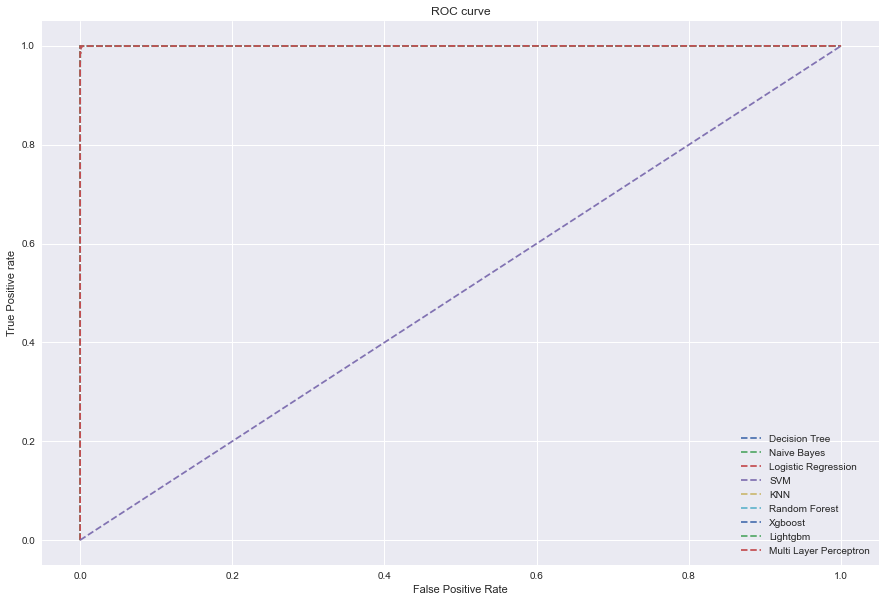

In [47]:
plt.figure(figsize=(15,10))
plt.plot(fpr_dt, tpr_dt, linestyle='--', label='Decision Tree')
plt.plot(fpr_nb, tpr_nb, linestyle='--', label='Naive Bayes')

plt.plot(fpr_logreg, tpr_logreg, linestyle='--', label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, linestyle='--', label='SVM')

plt.plot(fpr_knn, tpr_knn, linestyle='--', label='KNN')
plt.plot(fpr_rf, tpr_rf, linestyle='--', label='Random Forest')

plt.plot(fpr_xgb, tpr_xgb, linestyle='--', label='Xgboost')
plt.plot(fpr_lgb, tpr_lgb, linestyle='--', label='Lightgbm')

plt.plot(fpr_mlp, tpr_mlp, linestyle='--', label='Multi Layer Perceptron')
plt.plot(p_fpr, p_tpr, linestyle='--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();